# Perceptron

The Perceptron is one of the simplest artificial neural network architectures, introduced by Frank Rosenblatt in 1957. It is primarily used for binary classification.

At that time, traditional methods like Statistical Machine Learning and Conventional Programming were commonly used for predictions. Despite being one of the simplest forms of artificial neural networks, the Perceptron model proved to be highly effective in solving specific classification problems, laying the groundwork for advancements in AI and machine learning.

It is a simple algorithm that learns from the mistakes made during the classification process and adjusts the weights of the input features to improve the accuracy of the classification. 

```python 
y_pred = sign(w0 + w1*x1 + w2*x2 + ... + wn*xn)
wi = wi + learning_rate * (target - y_pred) * xi
```

In [8]:
# Import the necessary library
import numpy as np

# Build the Perceptron Model
class Perceptron:
    
    def __init__(self, num_inputs, learning_rate=0.01):
        # Initialize the weight and learning rate
        self.weights = np.random.rand(num_inputs + 1)
        self.learning_rate = learning_rate
    
    # Define the first linear layer 
    def linear(self, inputs):
        Z = inputs @ self.weights[1:].T + + self.weights[0]
        return Z
    
    # Define the Heaviside Step function.
    def Heaviside_step_fn(self, z):
        if z>=0:
            return 1
        else:
            return 0
        
    # Define the Prediction
    def predict(self, inputs):
        Z = self.linear(inputs)
        try:
            pred = []
            for z in Z:
                pred.append(self.Heaviside_step_fn(z))
        except:
            return self.Heaviside_step_fn(Z)
        return pred
    
    # Define the Loss function
    def loss(self, prediction, target):
        loss = (prediction-target)
        return loss
    
    #Define training
    def train(self, inputs, target):
        prediction = self.predict(inputs)
        error = self.loss(prediction, target)
        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0]  += self.learning_rate * error
        
    # Fit the model
    def fit(self, X, y, num_epochs):
        for epoch in range(num_epochs):
            for inputs, target in zip(X, y):
                self.train(inputs, target)

Accuracy: 0.975


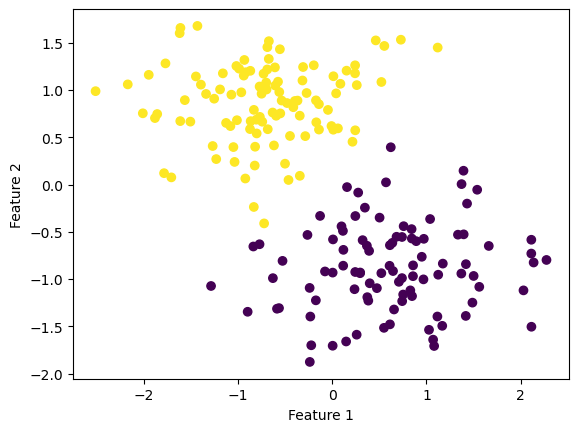

In [9]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a linearly separable dataset with two classes
X, y = make_blobs(n_samples=1000,
                  n_features=2, 
                  centers=2, 
                  cluster_std=3,
                  random_state=23)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=23,
                                                    shuffle=True
                                                   )

# Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set the random seed legacy
np.random.seed(23)

# Initialize the Perceptron with the appropriate number of inputs
perceptron = Perceptron(num_inputs=X_train.shape[1])

# Train the Perceptron on the training data
perceptron.fit(X_train, y_train, num_epochs=100)

# Prediction
pred = perceptron.predict(X_test)

# Test the accuracy of the trained Perceptron on the testing data
accuracy = np.mean(pred != y_test)
print("Accuracy:", accuracy)

# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()